# A3

In [2]:
from jupyterthemes import jtplot
jtplot.style(theme='chesterish')

In [4]:
# Standard imports
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import Network as Network
import copy

# Q1: Vanishing Gradient

## (a)

The logistic function may be written as:
$$
\begin{align}
{\sigma (z)}&= \frac{1} {1 + e^{-z}}
\end{align}
$$
The derivative of the function being:
$$
\begin{align}
\frac{d \sigma(z)}{dz} &= {\sigma(z)(1-\sigma(z))}
\end{align}
$$
From last week's assignment, we know that the derivative has a maximum value of 0.25 (at z= 0)
Therefore, since we may control h and b as independent variables in the equation, we can say:
$$
\begin{align}
|w\sigma^\prime(wh+b)| \leq |w(0.25)|
\end{align}
$$
Therefore,
$$
\begin{align}
|w\sigma^\prime(wh+b)| \geq 1 \\
\implies |w(0.25)| \geq 1 \\
\implies |w| \geq \frac{1}{0.25} \\
\implies |w| \geq 4 &
\end{align}
$$
Hence, proved


$$
\begin{align}
p ( c | \mu, \sigma) &= \frac{1} {(2\pi |\sigma|)^\frac{3}{2}}e^{\frac{-1}{2}(c-\mu)^T\sigma^{-1}(c-\mu)}
\end{align}
$$

## (b)

Let
$$
\begin{align}
m = \sigma(wh +b)
\end{align}
$$
We know,
$$
\begin{align}
|w\sigma^\prime(wh+b)| \geq 1
\implies |wm(1-m)| \geq 1
\end{align}
$$
This holds true when:
$$
\begin{align}
m^2 - m + \frac{1}{w} \leq 0 
\end{align}
$$
OR
$$
\begin{align}
 m^2 - m - \frac{1}{w} \geq 0 
\end{align}
$$
Let's solve the inequalities in a general form (with |w|). The roots are:
$$
\begin{align}
m = \frac{1 \pm \sqrt{1 - \frac{4}{|w|}}}{2}
\end{align}
$$
For ax^2 + bx + c = 0, since a > 0, we know that for the inequality:
$$
\begin{align}
\frac{1 - \sqrt{1 - \frac{4}{|w|}}}{2} \leq m \leq \frac{1 + \sqrt{1 - \frac{4}{|w|}}}{2}
\end{align}
$$
Substituting the logistic equation back into m:
$$
\begin{align}
\frac{1 - \sqrt{1 - \frac{4}{|w|}}}{2} \leq \frac{1}{1 + e^{-(wh + b)}} \leq \frac{1 + \sqrt{1 - \frac{4}{|w|}}}{2}
\end{align}
$$
This can be simplified to:
$$
\begin{align}
\frac{-(ln(\frac{1 + \sqrt{1 - \frac{4}{|w|}}}{1 - \sqrt{1 - \frac{4}{|w|}}}) + b)}{w} \leq h \leq \frac{-(ln(\frac{1 - \sqrt{1 - \frac{4}{|w|}}}{1 + \sqrt{1 - \frac{4}{|w|}}}) + b)}{w}
\end{align}
$$
The interval width of h can be calculated by taking the difference of the 2 extremes:

$$
\begin{align}
interval\space width = \frac{(ln(\frac{1 + \sqrt{1 - \frac{4}{|w|}}}{1 - \sqrt{1 - \frac{4}{|w|}}}) + b)}{w} - \frac{(ln(\frac{1 - \sqrt{1 - \frac{4}{|w|}}}{1 + \sqrt{1 - \frac{4}{|w|}}}) + b)}{w}
\end{align}
$$
Since both cases of positive and negative values of w lead to the same width, without loss of generalization we may replace w by |w|:
$$
\begin{align}
interval\space width = \frac{(ln(\frac{1 + \sqrt{1 - \frac{4}{|w|}}}{1 - \sqrt{1 - \frac{4}{|w|}}}) + b)}{|w|} - \frac{(ln(\frac{1 - \sqrt{1 - \frac{4}{|w|}}}{1 + \sqrt{1 - \frac{4}{|w|}}}) + b)}{|w|}
\end{align}
$$
$$
\begin{align}
interval\space width = \frac{1}{|w|}(ln(\frac{1 + \sqrt{1 - \frac{4}{|w|}}}{1 - \sqrt{1 - \frac{4}{|w|}}}) + b) - (ln(\frac{1 - \sqrt{1 - \frac{4}{|w|}}}{1 + \sqrt{1 - \frac{4}{|w|}}}) + b) \\
interval\space width = \frac{2}{|w|}(ln(1 + \sqrt{1 - \frac{4}{|w|}}) - ln(1 - \sqrt{1 - \frac{4}{|w|}})) \\
interval\space width = \frac{2}{|w|}(ln(\frac{1 + \sqrt{1 - \frac{4}{|w|}}}{1 - \sqrt{1 - \frac{4}{|w|}}})) \\
interval\space width = \frac{2}{|w|}(ln(\frac{1 + \sqrt{1 - \frac{4}{|w|}}}{1 - \sqrt{1 - \frac{4}{|w|}}}*\frac{1 + \sqrt{1 - \frac{4}{|w|}}}{1 + \sqrt{1 - \frac{4}{|w|}}}) \\
\end{align}
$$
$$
\begin{align}
interval\space width = \frac{2}{|w|}ln(\frac{2\sqrt{1 - \frac{4}{|w|}} - \frac{4}{|w|} + 2}{\frac{4}{|w|}})
\end{align}
$$
which can be simplified to:
$$
\begin{align}
interval\space width = \frac{2}{|w|}ln(\frac{|w|}{2}(1 + \sqrt{1 - \frac{4}{|w|}}) - 1)
\end{align}
$$
Hence, proved.

## (c) Plots

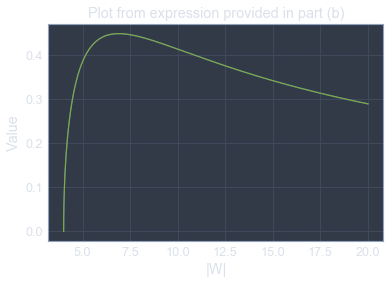

Maximum value of |w| occurs at 6.89


In [5]:
def get_value(w):
    return (2./np.abs(w)) * np.log((np.abs(w)/2.)*(1 + np.sqrt(1 - (4./np.abs(w)))) - 1)

x1 = np.linspace(4,20,5000)
y1 = get_value(x1)

x2 = np.linspace(-20,-4,5000)
y2 = get_value(x2)

plt.plot(np.abs(x1), y1)
plt.plot(np.abs(x2), y2)

plt.title('Plot from expression provided in part (b)')
plt.xlabel('|W|')
plt.ylabel('Value')


plt.show()
print("Maximum value of |w| occurs at %.2f" % x1[np.argmax(y1)])


# Q2: Dropout

## Dataset

In [7]:
def GenerateDatasets(n):
    # 1D -> 1D (line mapping)
    n_input = 1
    n_output = 1
    noise = 0.5

    #np.random.seed(452)
    a = np.random.rand()/2.
    m = np.random.rand() + 0.5
    b = np.random.rand()-0.5

    def myfunc(x):
        return a*x**2 + m*x + b

    # Create a training dataset
    n_samples = n
    training_output = []
    training_input = []
    xv = np.linspace(-1, 1, n_samples)
    for idx in range(n_samples):
        #x = np.random.rand()*2. - 1.
        x = xv[idx]
        t = myfunc(x) + np.random.normal(scale=noise)
        training_input.append(np.array([x]))
        training_output.append(np.array([t]))

    # Create a testing dataset
    test_input = []
    test_output = []
    n_test_samples = 300
    xv = np.linspace(-1, 1, n_test_samples)
    for idx in range(n_test_samples):
        #x = np.random.rand()*2. - 1.
        x = xv[idx] #+ np.random.normal(scale=0.1)
        t = myfunc(x) + np.random.normal(scale=noise)
        test_input.append(np.array([x]))
        test_output.append(np.array([t]))


    train = [np.array(training_input), np.array(training_output)]
    test = [np.array(test_input), np.array(test_output)]
    
    return train, test

## Sample Code

In [8]:
# Here is an example, creating a Network object.
net = Network.Network(cost='cross-entropy')
net.AddLayer(Network.Layer(1))
net.AddLayer(Network.Layer(6, act='logistic'))
net.AddLayer(Network.Layer(1, act='logistic'))

In [9]:
# Generate the training and testing datasets
P = 5
train, test = GenerateDatasets(P)

In [10]:
# Train the network
progress = net.SGD(train[0], train[1], epochs=100, lrate=1.)

In [11]:
# Evaluate the cost 
print('Training cost = '+str(net.Evaluate(train[0], train[1])))
print('    Test cost = '+str(net.Evaluate(test[0], test[1])))

# These results won't necessarily make sense, since the network model
# might not be the right choice for the dataset.

Training cost = -0.28093899812442913
    Test cost = -0.009424927204797295


## 2 (a), (b), 3 (a) Completing the RobustNetwork Class

In [12]:
class RobustNetwork(Network.Network):
    
    def FeedForward(self, x, dropout=0):
        '''
            y = net.FeedForward(x, dropout=0)

            Runs the network forward, starting with x as input.
            However, a random subset of the hidden nodes are set to 0 activity.
            Returns the activity of the output layer.

            Inputs:
              x is a batch of inputs
              dropout is a probability that a node is dropped, in [0,1]
              
            Outputs:
              y is the batch of outputs (no dropout or the output layer)
        '''
        # X shape: [num_samples, size_of_input_layer]
        
        if dropout==0.:
            self.dropout_nonzero = False  # Internal flag for dropout
            super(RobustNetwork, self).FeedForward(x)
        else:
            self.dropout_nonzero = True   # Internal flag for dropout
            
            x = np.array(x)  # Convert input to array, in case it's not
            
            self.lyr[0].h = x # Set input layer
            
            self.mask = []  # mask will record which nodes were dropped
            self.mask.append(None)  # Input layer does not have dropout
            
            # Save dropout or compute 1/dropout as layer_size/num_active
            self.dropout = dropout
            # Loop over connections
            for pre,post,W in zip(self.lyr[:-1], self.lyr[1:], self.W):
                
                # Calc. input current to next layer
                post.z = pre.h @ W + post.b

                # Use activation function to get activities
                post.h = post.sigma(post.z)
                
                if post == self.lyr[-1]:
                    # Dropout is added only to the hidden layers.
                    continue
                
                # Add dropout for this layer:
                # Dropout will remain constant for a mini-batch.
                # False: Dropped out, True: Contained
                post_mask = np.random.choice([False, True], size=post.N, p=[dropout, 1-dropout])
                self.mask.append(post_mask)
                post.h *= post_mask # post.h.shape = [num_samples, layer_size]
                
                scale = post.N/np.sum(post_mask) if np.sum(post_mask) > 0 else 1

                # Scale input to the next layer
                post.h *= scale
                
                
                
        # Return activity of output layer
        return self.lyr[-1].h
    
    
    
    def BackProp(self, t, lrate=0.05, decay=0.):
        '''
            net.BackProp(targets, lrate=0.05)
            
            Given the current network state and targets t, updates the connection
            weights and biases using the backpropagation algorithm.
            
            Inputs:
             t      an array of targets (number of samples must match the
                    network's output)
             lrate  learning rate
             decay  is the coefficient for weight/bias decay
        '''
        t = np.array(t)  # convert t to an array, in case it's not
        
        # Error gradient for top layer
        dEdz = self.TopGradient(t)
        
        # Loop down through the layers
        for i in range(self.n_layers-2, -1, -1):
            pre = self.lyr[i]
            
            # Gradient w.r.t. weights
            dEdW = pre.h.T @ dEdz
            
            # Adding Decay to the weights
            dEdW += 2*decay*self.W[i]
            
            # Gradient w.r.t. biases
            dEdb = np.sum(dEdz, axis=0)
            
            #Adding Decay to the biases
            dEdb += 2*decay*self.lyr[i+1].b
            
            # Project error gradient down to layer below.
            if i>0:
                # pre.sigma_z_p(pre.z) gives dh/dz not dH/dz (dH = 2*dh) since it calculate logistic()
                if self.dropout_nonzero:
                    scale = len(self.mask[i])/np.sum(self.mask[i]) if np.sum(self.mask[i]) > 0 else 1
                    # Broadcasting matched the shapes: [num_samples, layer_size]
                    dEdz = ( dEdz @ (scale * self.W[i]).T ) * (pre.sigma_z_p(pre.z) * self.mask[i])
                else:
                    dEdz = ( dEdz @ self.W[i].T ) * pre.sigma_z_p(pre.z)
                    
            
            # Update weights and biases
            self.W[i] -= lrate*dEdW
            self.lyr[i+1].b -= lrate*dEdb
    
    
    def SGD(self, inputs, targets, lrate=0.05, epochs=1, batch_size=10, decay=0, dropout=0):
        '''
            progress = net.SGD(inputs, targets, lrate=0.05, epochs=1, decay=0, dropout=0)

            Performs Stochastic Gradient Descent on the network.
            Run through the dataset in batches 'epochs' number of times, incrementing the
            network weights after each batch. For each epoch, it
            shuffles the dataset.

            Inputs:
              inputs  is an array of input samples
              targets is a corresponding array of targets
              lrate   is the learning rate (try 0.001 to 5)
              epochs  is the number of times to go through the training data
              decay   is the decay coefficient for the weights and biases
              dropout is the dropout probability
              
            Outputs:
              progress is an (expochs)x2 array with epoch in the first column, and 
                      cost in the second column
        '''
        loss_history = []
        for k in range(epochs):
            batches = Network.MakeBatches(inputs, targets, batch_size=batch_size, shuffle=True)
            for mini_batch in batches:
                self.FeedForward(mini_batch[0], dropout=dropout)
                self.BackProp(mini_batch[1], decay=decay)

            loss_history.append([k, self.Evaluate(inputs, targets)])

        return np.array(loss_history)


## (c) Create the Network

In [13]:
def create_networks(cost_function='MSE', activation_hidden='arctan', activation_output='identity', lyr_sizes=[1,10,1]):
    original_net = RobustNetwork(cost=cost_function)
    original_net.AddLayer(Network.Layer(lyr_sizes[0]))
    original_net.AddLayer(Network.Layer(lyr_sizes[1], act=activation_hidden))
    original_net.AddLayer(Network.Layer(lyr_sizes[2], act=activation_output))
    dropout_net = copy.deepcopy(original_net)
    return original_net, dropout_net

original_net, dropout_net = create_networks()

## (d) Train and Evaluate without dropout

In [14]:
def train_and_evaluate(network, train, test, dropout=0, decay=0, epochs=5000, lrate=1., batch_size=5):
    progress = network.SGD(train[0], train[1], epochs=epochs, lrate=lrate, dropout=dropout, decay=decay, batch_size=batch_size)
    train_cost = network.Evaluate(train[0], train[1])
    test_cost = network.Evaluate(test[0], test[1])
    return train_cost, test_cost

train, test = GenerateDatasets(5)
train_cost, test_cost = train_and_evaluate(original_net, train, test, dropout=0)
print('Training cost = '+ str(train_cost))
print('Test cost = '+str(test_cost))

Training cost = 0.006668792684497686
Test cost = 0.5398618645513655


## (e) Train and Evaluate with dropout

In [15]:
train_cost, test_cost= train_and_evaluate(dropout_net, train, test, dropout=0.2)
print('Training cost = '+ str(train_cost))
print('Test cost = '+str(test_cost))

Training cost = 0.25555427398268676
Test cost = 0.27090553718700455


## (f) Plot training data and models

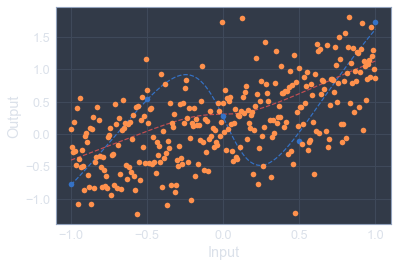

In [16]:
s = np.linspace(-1, 1, 200)
original_output = original_net.FeedForward(np.array([s]).T)
dropout_output = dropout_net.FeedForward(np.array([s]).T)

plt.plot(s,original_output, 'b--')
plt.plot(s,dropout_output, 'r--')
plt.plot(train[0], train[1], 'bo')
plt.plot(test[0], test[1], 'yo')
plt.xlabel('Input')
plt.ylabel('Output');

## (g) Average performance over 10 datasets

In [41]:
test_cost_original, test_cost_dropout = [], []
for i in range(10):
    train, test = GenerateDatasets(5)
    original_net, dropout_net = create_networks()
    _, test_original = train_and_evaluate(original_net, train, test, dropout=0)
    _, test_dropout = train_and_evaluate(dropout_net, train, test, dropout=0.2)
    test_cost_original.append(test_original)
    test_cost_dropout.append(test_dropout)
    
print("Mean Test Cost Original Network: %s" % str(np.mean(test_cost_original)))
print("Mean Test Cost Dropout Network: %s" % str(np.mean(test_cost_dropout)))
    

Mean Test Cost Original Network: 0.5761321022690868
Mean Test Cost Dropout Network: 0.4338460072692746


The Dropout Approach is preferred since it gives a lower mean error on the Test Set. The dropout is used as regularization technique - for every mini batch we randomly choose the activated nodes in a layer and hence create an ensemble of networks that learn the training function. This ensures the learned function doesn't overfit the data. Thus, even though we me have a larger error on the training set (implying did not overfit in our case), we get a lower error on the test set.

# Q3: Weight Decay

## (a) Implement weigth decay in BackProp (see code above)

## (b) Average performance over 10 datasets

In [96]:
test_cost_original, test_cost_decay = [], []
for i in range(10):
    train, test = GenerateDatasets(5)
    original_net, decay_net = create_networks()
    test_cost_original.append(train_and_evaluate(original_net, train, test, dropout=0, decay=0))
    test_cost_decay.append(train_and_evaluate(dropout_net, train, test, dropout=0, decay=0.0004))
    
print("Mean Test Cost Original Network: %s" % str(np.mean(test_cost_original)))
print("Mean Test Cost Decay Network: %s" % str(np.mean(test_cost_decay)))

Mean Test Cost Original Network: 0.28011730458254797
Mean Test Cost Decay Network: 0.24124101186517674


The Decay Approach is preferred since it gives a lower mean error on the Test Set. The weight decay is used as regularization parameter - the addition of the term in the error function implies that we prefer smaller weights over larger ones, and hence functions that don't overfit the data. Thus, even though we me have a larger error on the training set (implying did not overfit in our case), we get a lower error on the test set.

# Q4: Classifier Networks

## Create and interesting dataset

In [100]:
def ClassPlot(x, y):
    # FeedForward
    yc = Network.OneHot(y)
    colour_options = ['y', 'b', 'r', 'g', 'k']
    cidx = np.argmax(yc, axis=1)
    colours = [colour_options[k] for k in cidx]
    plt.scatter(x[:,0],x[:,1], color=colours, marker='.')
    plt.axis('equal');

def GaussianCluster(mu, sa, N, theta=0.):
    theta_rad = theta/180*np.pi
    c, s = np.cos(theta_rad), np.sin(theta_rad)
    R = np.array([[c,-s],[s,c]])
    M = R @ np.diag(sa) @ R.T
    y = np.random.multivariate_normal(mu, M, N)
    return y

def CreateDataset(params):
    '''
        train, test = CreateDataset(params)
        
        Creates a dataset using a bunch of Gaussian clouds.
        
        Inputs:
          params is a list of 5-tuples. Each tuple (or list)
             describes a 2-D Gaussian cloud:
             1) the mean
             2) standard deviation along x and y directions
             3) rotation of cloud (degrees counter-clockwise)
             4) class index
             5) number of points
             
        Outputs:
          train is a list containing 2 arrays
             - the first array contains the training inputs,
               one per row
             - the second array contains the corresponding classes
          test has the same structure as train, but with
               half the number of samples
    '''
    train_inputs = []
    train_outputs = []
    test_inputs = []
    test_outputs = []
    all_c = [p[3] for p in params]
    n_classes = np.max(all_c)
    for p in params:
        xx = GaussianCluster(p[0], p[1], p[4], theta=p[2])
        yy = np.zeros((p[4], n_classes+1))
        yy[:,p[3]] = 1.
        train_inputs.append(xx)
        train_outputs.append(yy)
        xtest = GaussianCluster(p[0], p[1], int(p[4]/2), theta=p[2])
        ytest = np.zeros((int(p[4]/2), n_classes+1))
        ytest[:,p[3]] = 1.
        test_inputs.append(xtest)
        test_outputs.append(ytest)
    train = [np.vstack(train_inputs), np.vstack(train_outputs)]
    test = [np.vstack(test_inputs), np.vstack(test_outputs)]
    return train, test

# 0=y, 1=b, 2=r
params = [[[0.5, 0.5],   [0.025, 0.01],  -45, 0, 50],
          [[-0.5,-0.5],  [0.025, 0.01],  -45, 0, 50],
          [[-0.3,-0.35], [0.04,0.01],     10, 0, 80],
          [[0.6,0],      [0.01,0.01],      0, 0, 50],
          [[0.1,-0.04],  [0.1,0.005],     20, 0, 80],
          [[0.5,-0.5],   [0.02,0.01],     45, 1, 50],
          [[0,0.6],      [0.01,0.01],      0, 1, 50],
          [[-0.5,0.1],   [0.02,0.01],     30, 1, 80],
          [[-0.5,0.5],   [0.02,0.01],     45, 2, 50],
          [[0,-0.6],     [0.01,0.01],      0, 2, 50],
          [[0.2,0.3],    [0.01,0.004],     0, 2, 80],
          [[-0.2,0.37],  [0.02,0.005],   -30, 2, 50],
          [[0.25,-0.3],  [0.005,0.01],     0, 3, 60],
          [[-0.1,0.1],   [0.01,0.01],    -30, 3, 50]
         ]

In [101]:
train, test = CreateDataset(params)

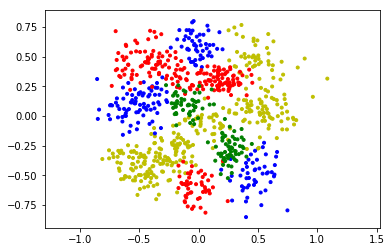

In [102]:
ClassPlot(train[0], train[1]);

In [101]:
# This is for finding the best possible parameters giving the highest accuracy
# Generate possible combinations of Loss functions ans Activations
cost_functions = ['categorical-cross-entropy', 'cross-entropy', 'MSE']
hidden_activation_functions = ['logistic','ReLU','arctan','tanh','identity']
output_activation_functions = ['logistic','ReLU','tanh','identity']
valid_output_lyr_activations = {cf: output_activation_functions for cf in cost_functions}
valid_output_lyr_activations['categorical-cross-entropy'] = ['softmax']

lyr_sizes = [2,10,4]
best_mean = 0.0
best_params = []

for cost_f in cost_functions:
    for act_h_f in hidden_activation_functions:
        for act_o_f in valid_output_lyr_activations[cost_f]: 
            test_accuracy = []
            for i in range(5):
                net, _ = create_networks(cost_f, activation_hidden=act_h_f, activation_output=act_o_f,lyr_sizes=lyr_sizes)
                progress = net.SGD(train[0], train[1], epochs=400, lrate=0.5, batch_size=10)
                outputs, targets = net.FeedForward(test[0]), test[1]
                accuracy = Network.ClassificationAccuracy(outputs, targets)
                test_accuracy.append(accuracy)
            mean_test_accuracy = np.mean(test_accuracy)
            print("Cost Function: %s Activation Hidden: %s Activation Output: %s Mean Test Accuracy: %s" % (cost_f, act_h_f, act_o_f, mean_test_accuracy))
            if mean_test_accuracy > best_mean:
                best_mean = mean_test_accuracy
                best_params = [cost_f, act_h_f, act_o_f]

print("Best Accuracy: %s with parameters: %s" % (str(best_mean), ' '.join(best_params)))

Cost Function: categorical-cross-entropy Activation Hidden: logistic Activation Output: softmax Mean Test Accuracy: 0.8857831325301204
Cost Function: categorical-cross-entropy Activation Hidden: ReLU Activation Output: softmax Mean Test Accuracy: 0.9002409638554217
Cost Function: categorical-cross-entropy Activation Hidden: arctan Activation Output: softmax Mean Test Accuracy: 0.9195180722891566
Cost Function: categorical-cross-entropy Activation Hidden: tanh Activation Output: softmax Mean Test Accuracy: 0.9180722891566264
Cost Function: categorical-cross-entropy Activation Hidden: identity Activation Output: softmax Mean Test Accuracy: 0.4997590361445784
Cost Function: cross-entropy Activation Hidden: logistic Activation Output: logistic Mean Test Accuracy: 0.6014457831325302


/Users/pranaab/Developer/Term4B/CS489/A3/Network.py:102: RuntimeWarning: divide by zero encountered in true_divide
  return (y-t) / y / (1.-y) / NSamples(y)
/Users/pranaab/Developer/Term4B/CS489/A3/Network.py:102: RuntimeWarning: invalid value encountered in true_divide
  return (y-t) / y / (1.-y) / NSamples(y)
/Users/pranaab/Developer/Term4B/CS489/A3/Network.py:379: RuntimeWarning: invalid value encountered in multiply
  return self.cost_p(self.lyr[-1].h, targets) * self.lyr[-1].sigma_p(self.lyr[-1].h) / NSamples(targets)


Cost Function: cross-entropy Activation Hidden: logistic Activation Output: ReLU Mean Test Accuracy: 0.37349397590361444


/Users/pranaab/Developer/Term4B/CS489/A3/Network.py:98: RuntimeWarning: invalid value encountered in log
  E = -np.sum( t*np.log(y) + (1.-t)*np.log(1.-y) )


Cost Function: cross-entropy Activation Hidden: logistic Activation Output: tanh Mean Test Accuracy: 0.24096385542168677
Cost Function: cross-entropy Activation Hidden: logistic Activation Output: identity Mean Test Accuracy: 0.2959036144578313
Cost Function: cross-entropy Activation Hidden: ReLU Activation Output: logistic Mean Test Accuracy: 0.8154216867469879
Cost Function: cross-entropy Activation Hidden: ReLU Activation Output: ReLU Mean Test Accuracy: 0.37349397590361444


/Users/pranaab/Developer/Term4B/CS489/A3/Network.py:98: RuntimeWarning: divide by zero encountered in log
  E = -np.sum( t*np.log(y) + (1.-t)*np.log(1.-y) )
/Users/pranaab/Developer/Term4B/CS489/A3/Network.py:98: RuntimeWarning: invalid value encountered in multiply
  E = -np.sum( t*np.log(y) + (1.-t)*np.log(1.-y) )


Cost Function: cross-entropy Activation Hidden: ReLU Activation Output: tanh Mean Test Accuracy: 0.3007228915662651
Cost Function: cross-entropy Activation Hidden: ReLU Activation Output: identity Mean Test Accuracy: 0.2780722891566265
Cost Function: cross-entropy Activation Hidden: arctan Activation Output: logistic Mean Test Accuracy: 0.8260240963855422
Cost Function: cross-entropy Activation Hidden: arctan Activation Output: ReLU Mean Test Accuracy: 0.37349397590361444
Cost Function: cross-entropy Activation Hidden: arctan Activation Output: tanh Mean Test Accuracy: 0.20867469879518072
Cost Function: cross-entropy Activation Hidden: arctan Activation Output: identity Mean Test Accuracy: 0.30024096385542165
Cost Function: cross-entropy Activation Hidden: tanh Activation Output: logistic Mean Test Accuracy: 0.853012048192771
Cost Function: cross-entropy Activation Hidden: tanh Activation Output: ReLU Mean Test Accuracy: 0.37349397590361444
Cost Function: cross-entropy Activation Hidde

## (a) Create and Evaluate a Neural Network

In [103]:
#Create Network
net = RobustNetwork(cost='categorical-cross-entropy')
net.AddLayer(Network.Layer(2))
net.AddLayer(Network.Layer(10, act='arctan'))
net.AddLayer(Network.Layer(4, act='softmax'))

#Evaluate Network
train, test = CreateDataset(params)
progress = net.SGD(train[0], train[1], epochs=400, lrate=0.5)

## (b) Evaluate Model

Accruracy: 0.9180722891566265


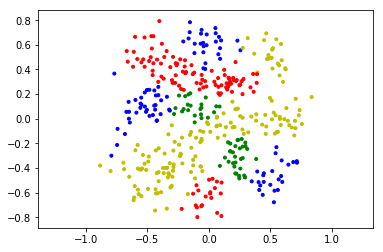

In [104]:
outputs, targets = net.FeedForward(test[0]), test[1]
accuracy = Network.ClassificationAccuracy(outputs, targets)
print("Accruracy: %s"%accuracy)

ClassPlot(test[0], outputs)



## (c) Crappy Network

Accruracy: 0.5204819277108435


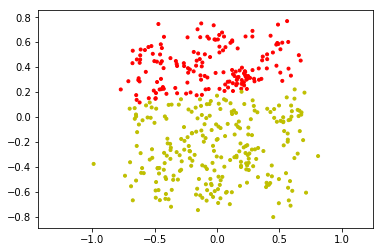

In [105]:
#Create Network
net = RobustNetwork(cost='categorical-cross-entropy')
net.AddLayer(Network.Layer(2))
net.AddLayer(Network.Layer(10, act='identity'))
net.AddLayer(Network.Layer(4, act='softmax'))

#Evaluate Network
train, test = CreateDataset(params)
progress = net.SGD(train[0], train[1], epochs=400, lrate=0.5)

outputs, targets = net.FeedForward(test[0]), test[1]
accuracy = Network.ClassificationAccuracy(outputs, targets)
print("Accruracy: %s"%accuracy)

ClassPlot(test[0], outputs)